In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (57).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (6).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (5).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (24).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (42).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (9).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (37).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (30).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (59).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (50).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (20).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (14).jpg
/kaggle

In [2]:
import os
dircs=os.listdir('/kaggle/input/Fishdiseasedataset/combine/FishDisease')

In [3]:
X_directory=[]
y_directory=[]
for directory in dircs:
    image_paths=os.listdir(f'/kaggle/input/Fishdiseasedataset/combine/FishDisease/{directory}')
    for img_name in image_paths:
        X_directory.append(f'/kaggle/input/Fishdiseasedataset/combine/FishDisease/{directory}/{img_name}')
        y_directory.append(directory)

In [4]:
df={"fishimages":X_directory,"fishlabels":y_directory}

In [5]:
df = pd.DataFrame(df)
df.style

,fishimages,fishlabels
0,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-166.png,white spot
1,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-246.png,white spot
2,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-263.png,white spot
3,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-264.png,white spot
4,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-92.png,white spot
5,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-123.png,white spot
6,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-93.png,white spot
7,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-29.png,white spot
8,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-223.png,white spot
9,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-45.png,white spot


In [6]:
import pandas as pd
import numpy as np
df=pd.DataFrame(df)

In [7]:
from sklearn.preprocessing import OneHotEncoder
df = df.sample(frac=1).reset_index(drop=True)
onehot=OneHotEncoder()
lab=onehot.fit_transform(df['fishlabels'].values.reshape(-1,1)).toarray()
images=df['fishimages']
print('total labels of images',len(lab))
print('total images',len(images))

total labels of images 1382
total images 1382


In [8]:
import cv2
import matplotlib.pyplot as plt
imgs=[]
for img in images:
    if img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)

        # define range of white color in HSV
        # change it according to your need !
        lower_white = np.array([0,0,168], dtype=np.uint8)
        upper_white = np.array([172,111,255],dtype=np.uint8)

        # Threshold the HSV image to get only white colors
        mask = cv2.inRange(hsv, lower_white, upper_white)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)
        imgs.append(res)
         
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/red spot/"):
        imag = cv2.imread(img)

        frame = cv2.resize(imag,(224,224)) 

        kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
        image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)

        lower_red = np.array([0,50,50])
        upper_red = np.array([10,255,255])


        #upper red
        lower_red2 = np.array([170,50,50])
        upper_red2 = np.array([180,255,255])

        mask = cv2.inRange(hsv, lower_red, upper_red)
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


        mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
        res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

        red=res+res2
        imgs.append(red)
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/black spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        imagehsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)


        lower_black = np.array([0,0,0])
        upper_black = np.array([179,255,127])

        imagemask = cv2.inRange(imagehsv, lower_black, upper_black)
        result = cv2.bitwise_not(image_sharp,image_sharp, mask=imagemask)

        imgs.append(result)
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/fresh fish/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)

        imgs.append(image_sharp)

In [9]:
X_preprocess=np.array(imgs)
y_preprocess=np.array(lab)

In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_preprocess, y_preprocess, random_state = 42, 
                                                   test_size=0.20)

In [11]:
X_train_norm=train_x/255.0
X_test_norm=test_x/255.0

In [18]:
from tensorflow.keras.applications import vgg16
 
# Init the VGG model 
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3),pooling="avg")


2022-11-30 20:32:57.988652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 20:32:57.993081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 20:32:57.993823: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 20:32:57.994925: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [19]:

for layer in vgg_conv.layers[4:15]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7eff93fc8410> True
<keras.layers.convolutional.Conv2D object at 0x7efd48638750> True
<keras.layers.convolutional.Conv2D object at 0x7eff926f9d10> True
<keras.layers.pooling.MaxPooling2D object at 0x7efd48795990> True
<keras.layers.convolutional.Conv2D object at 0x7efd48a26510> False
<keras.layers.convolutional.Conv2D object at 0x7efd48a2c6d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7efd48a26610> False
<keras.layers.convolutional.Conv2D object at 0x7efd48a35890> False
<keras.layers.convolutional.Conv2D object at 0x7efd48a3a050> False
<keras.layers.convolutional.Conv2D object at 0x7efd48638d90> False
<keras.layers.pooling.MaxPooling2D object at 0x7efd48a35950> False
<keras.layers.convolutional.Conv2D object at 0x7efd48a45dd0> False
<keras.layers.convolutional.Conv2D object at 0x7efd48a4d610> False
<keras.layers.convolutional.Conv2D object at 0x7efd48a45f50> False
<keras.layers.pooling.MaxPooling2D object at 0x7efd48a571d0> Fal

In [47]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.layers import  GlobalAveragePooling2D
# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(Flatten())

model.add(Dense(1024, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))

model.add(Dropout(0.4))


model.add(Dense(4, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 4100      
Total params: 15,244,100
Trainable params: 7,647,556
Non-trainable params: 7,596,544
_________________________________________________________________


In [48]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
 rotation_range=30,
 featurewise_center=True,   
 zoom_range=0.2,
 horizontal_flip=True,
 vertical_flip=True,

 fill_mode="nearest")

In [49]:
test_datagen=ImageDataGenerator()

In [50]:
train_generator=train_datagen.flow(X_train_norm, train_y,batch_size=20)

In [51]:
validation_generator=test_datagen.flow(X_test_norm, test_y,batch_size=20)

In [52]:
from keras.callbacks import EarlyStopping
import tensorflow
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(0.00001),
              metrics=['acc'])
 
# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(
      train_generator,
      steps_per_epoch=
     train_generator.n/train_generator.batch_size,
    epochs=30,
      validation_data=validation_generator, 
    validation_steps=validation_generator.n/validation_generator.batch_size,
    callbacks=[es],
      verbose=1)

Epoch 1/30
55/55 [==============================] - 15s 257ms/step - loss: 4.4680 - acc: 0.2516 - val_loss: 2.2586 - val_acc: 0.2527
Epoch 2/30
55/55 [==============================] - 14s 259ms/step - loss: 1.4398 - acc: 0.5665 - val_loss: 0.3460 - val_acc: 0.9675
Epoch 3/30
55/55 [==============================] - 14s 247ms/step - loss: 0.4693 - acc: 0.8624 - val_loss: 0.1747 - val_acc: 0.9856
Epoch 4/30
55/55 [==============================] - 14s 257ms/step - loss: 0.2222 - acc: 0.9647 - val_loss: 0.1367 - val_acc: 0.9856
Epoch 5/30
55/55 [==============================] - 14s 251ms/step - loss: 0.1656 - acc: 0.9738 - val_loss: 0.1182 - val_acc: 0.9892
Epoch 6/30
55/55 [==============================] - 14s 258ms/step - loss: 0.1238 - acc: 0.9882 - val_loss: 0.1104 - val_acc: 0.9856
Epoch 7/30
55/55 [==============================] - 14s 249ms/step - loss: 0.1074 - acc: 0.9882 - val_loss: 0.1064 - val_acc: 0.9856
Epoch 8/30
55/55 [==============================] - 14s 252ms/step - 

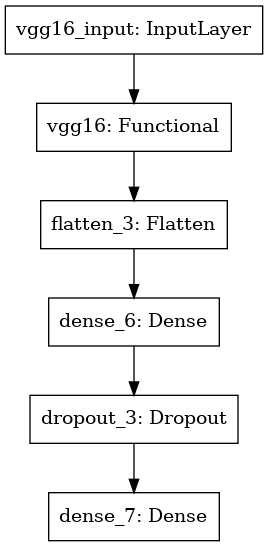

In [54]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [53]:
model.evaluate(validation_generator,batch_size=20)

14/14 [==============================] - 1s 55ms/step - loss: 0.1055 - acc: 0.9783


[0.10550539195537567, 0.9783393740653992]

Confusion Matrix
[[68  3  0  0]
 [ 0 73  0  0]
 [ 0  0 67  3]
 [ 0  0  0 63]]
['Black Spot', 'Fresh Fish', 'Red Spot', 'White Spot']


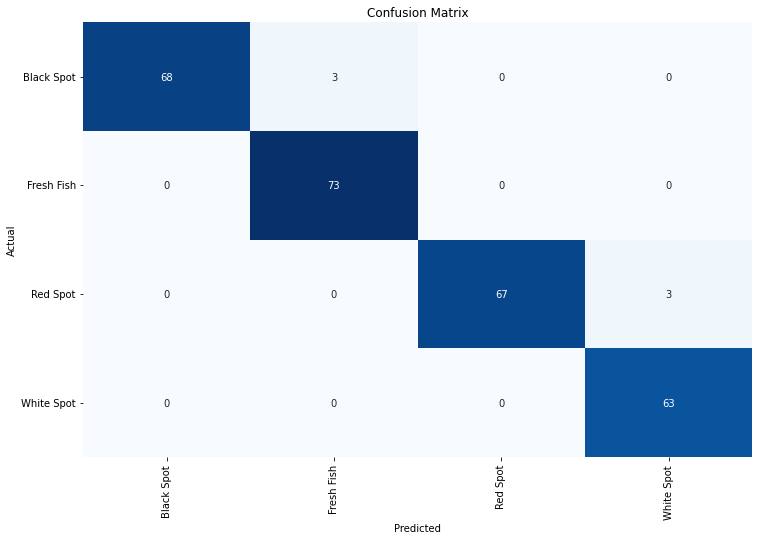

In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import seaborn as sns
y_test_arg=np.argmax(test_y,axis=1)
Y_pred = np.argmax(model.predict(X_test_norm),axis=1)
print('Confusion Matrix')
cm=confusion_matrix(y_test_arg, Y_pred)
print(cm)
class_name={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
classes=list(class_name.values())
print(classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(4)+.5,classes, rotation=90)
plt.yticks(np.arange(4)+.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [56]:
print('classification report')
print(classification_report(y_test_arg,Y_pred,target_names=classes, digits= 4))

classification report
              precision    recall  f1-score   support

  Black Spot     1.0000    0.9577    0.9784        71
  Fresh Fish     0.9605    1.0000    0.9799        73
    Red Spot     1.0000    0.9571    0.9781        70
  White Spot     0.9545    1.0000    0.9767        63

    accuracy                         0.9783       277
   macro avg     0.9788    0.9787    0.9783       277
weighted avg     0.9793    0.9783    0.9783       277



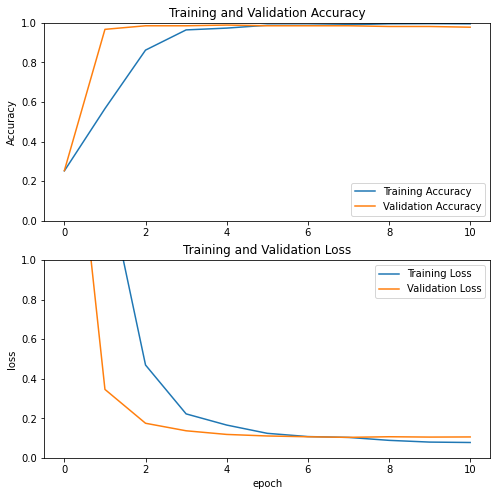

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()